In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
df['title'].nunique()

110

In [9]:
def reason(string):
    t=string.split(':')
    return t[0]
df['Reason']=df['title'].apply(reason)

In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

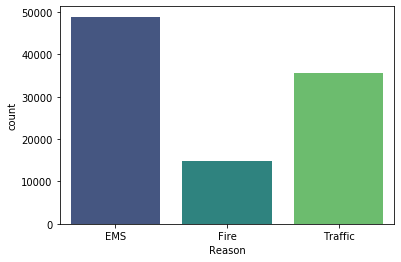

In [11]:
sns.countplot('Reason',data=df,palette='viridis')

In [12]:
type('timeStamp')

str

In [13]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [14]:
time = df['timeStamp'].iloc[0]
time.day

10

In [15]:
df['hour']=df['timeStamp'].apply(lambda time: time.hour)
df['Day of Week']= df['timeStamp'].apply(lambda time: time.dayofweek)
df['month']=df['timeStamp'].apply(lambda time: time.month)

In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Day of Week,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,3,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,3,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,3,12


In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df['Day of Week']=df['Day of Week'].map(dmap)

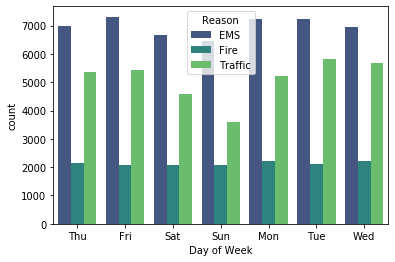

In [19]:
sns.countplot(x=df['Day of Week'],hue=df['Reason'],palette='viridis')

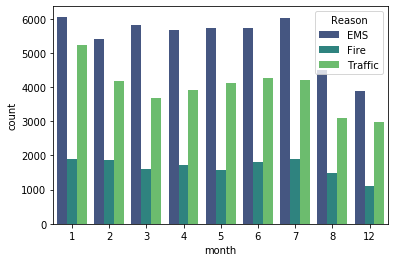

In [20]:
sns.countplot(df['month'],hue=df['Reason'],palette='viridis')

In [21]:
byMonth = df.groupby('month').count()

In [22]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Day of Week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [23]:
sns.set_style('whitegrid')

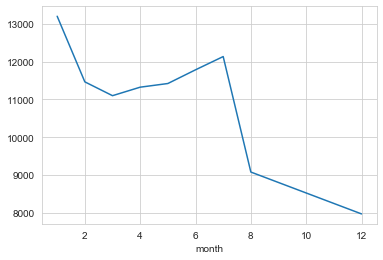

In [24]:
byMonth['lat'].plot()

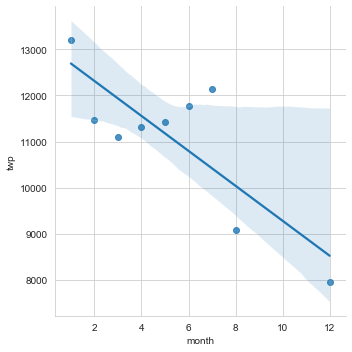

In [25]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

In [26]:
df['Date']=df['timeStamp'].apply(lambda time: time.date())

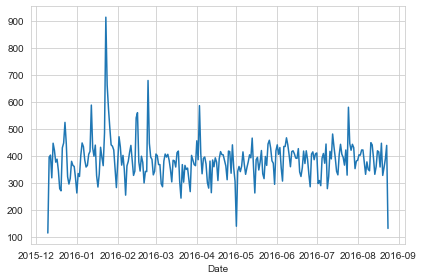

In [27]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [28]:
a=df.groupby('Reason').count()

In [29]:
a.reset_index()

,Reason,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,Day of Week,month,Date
0,EMS,48877,48877,48877,44327,48877,48877,48853,48877,48877,48877,48877,48877,48877
1,Fire,14920,14920,14920,13012,14920,14920,14903,14900,14920,14920,14920,14920,14920
2,Traffic,35695,35695,35695,29298,35695,35695,35693,35196,35695,35695,35695,35695,35695


Text(0.5, 1.0, 'EMS')

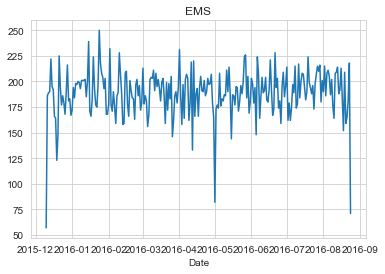

In [30]:
a=df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
a.set_title('EMS')

Text(0.5, 1.0, 'Fire')

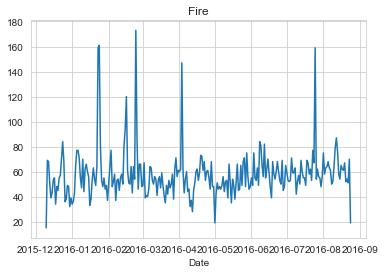

In [31]:
a=df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
a.set_title('Fire')

Text(0.5, 1.0, 'Traffic')

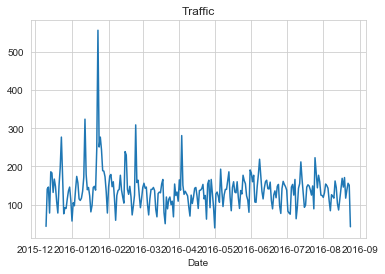

In [32]:
a=df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
a.set_title('Traffic')

In [33]:
a=df.groupby(['Day of Week','hour']).count()['Reason'].unstack()

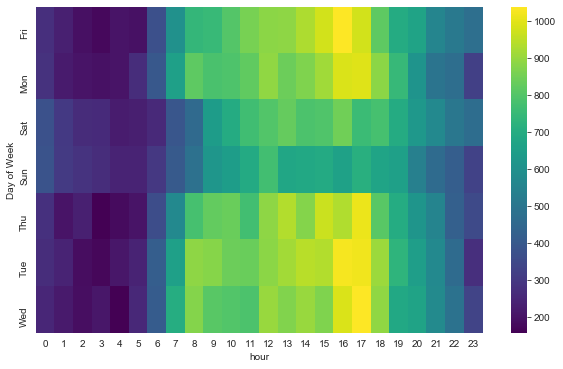

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(a,cmap='viridis')

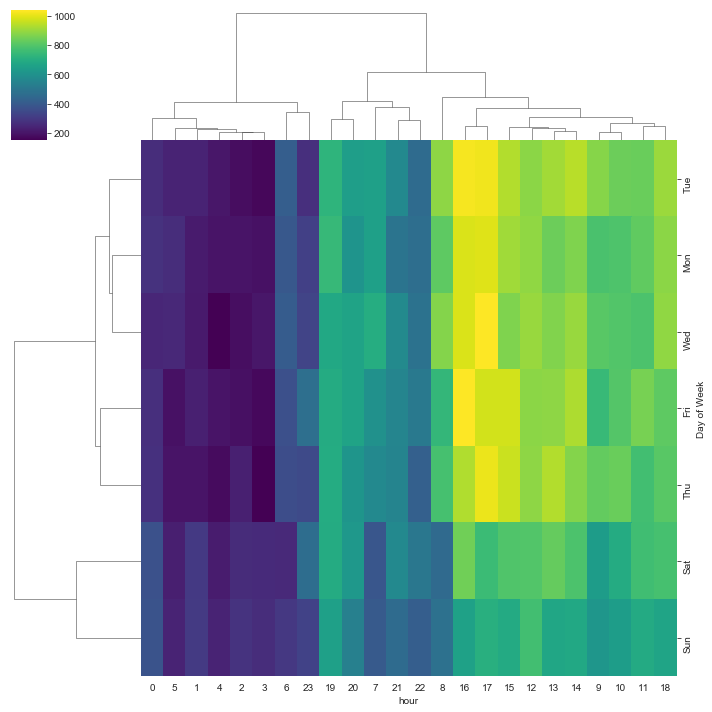

In [35]:
sns.clustermap(a,cmap='viridis')

In [36]:
b=df.groupby(['Day of Week','month']).count()['Reason'].unstack()

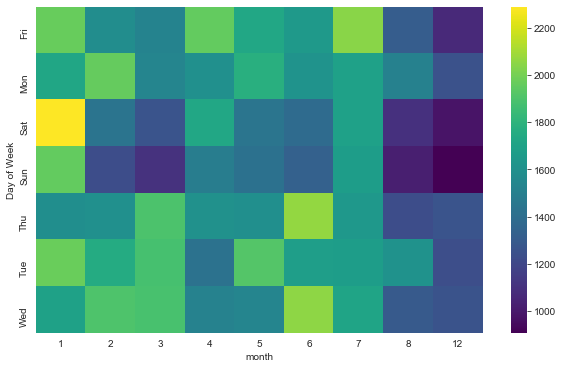

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(b,cmap='viridis')

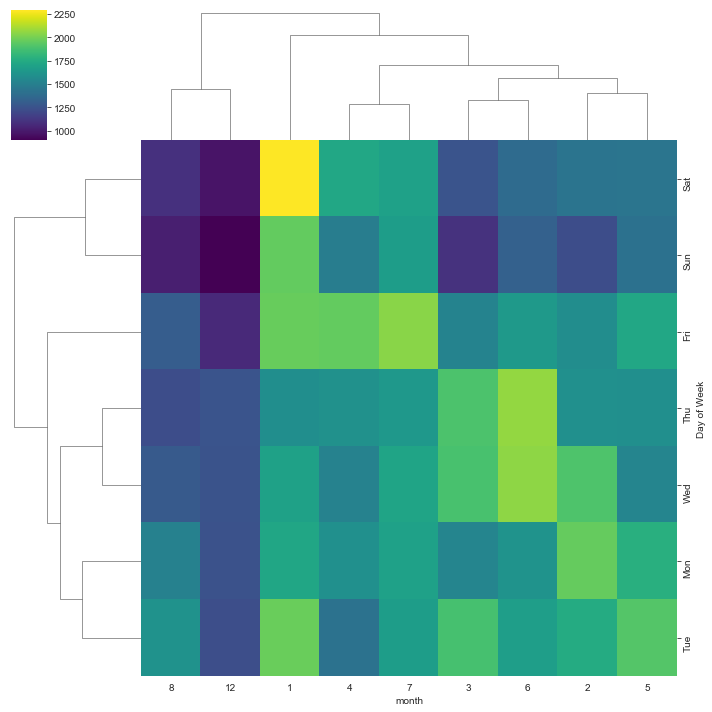

In [38]:
sns.clustermap(b,cmap='viridis')